In [1]:
# Analyzing and Processing Audio Signals
import librosa

def load_audio(file_path):
    # y = audio signal over time
    # sr = sampling rate
    y, sr = librosa.load(file_path, sr=None)
    return y, sr


wav_path = "data_mgp_01.wav"
audio_data, sampling_rate = load_audio(wav_path)

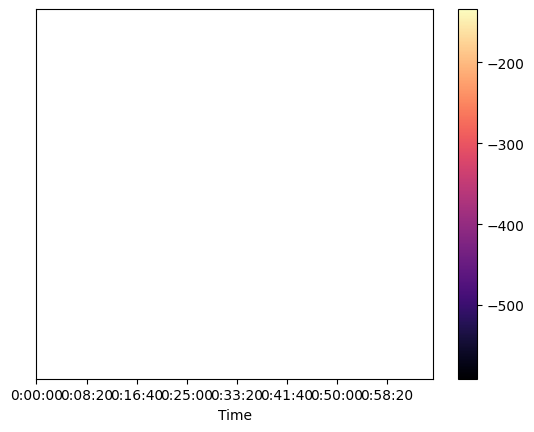

In [2]:
# Visually represent the MFCCs of an audio file
# mfccs = mel-frequency cepstral coefficients

import librosa.display
import matplotlib.pyplot as plt

def extract_mfcc(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=1)
    return mfccs


wav_path = "data_mgp_01.wav"
audio_data, sampling_rate = load_audio(wav_path)

mfccs = extract_mfcc(audio_data, sampling_rate)

# Display the MFCCs
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.show()

In [3]:
import numpy as np
np.unique(mfccs).shape

(168494,)

In [3]:
mfccs = mfccs.transpose()
mfccs.shape

(170859, 1)

In [4]:
import numpy as np

In [5]:
# Batch Generation
def get_batch(vectorized_songs, seq_length, batch_size):
  
  # the length of the vectorized songs string
  n = vectorized_songs.shape[0] - 1

  # randomly choose the starting indices for the examples in the training batch
  idx = np.random.choice(n-seq_length, batch_size)

  input_batch = [vectorized_songs[i : i+seq_length] for i in idx]
  output_batch = [vectorized_songs[i+1 : i+seq_length+1] for i in idx]
  

  # x_batch, y_batch provide the true inputs and targets for network training
  x_batch = np.reshape(input_batch, [batch_size, seq_length])
  y_batch = np.reshape(output_batch, [batch_size, seq_length])
  return x_batch, y_batch

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

def build_audio_generation_model(batch_size):
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=100, output_dim=64, batch_input_shape=[batch_size, None]))

    # LSTM layers
    model.add(LSTM(units=256, return_sequences=True))
    model.add(LSTM(units=256, return_sequences=True))
    
    # Dense layer for output
    model.add(Dense(units=32, activation='linear'))
    model.compile(loss='mse', optimizer='adam')

    return model

# Build the model
model = build_audio_generation_model(32)

# Print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (32, None, 64)            6400      
                                                                 
 lstm_12 (LSTM)              (32, None, 256)           328704    
                                                                 
 lstm_13 (LSTM)              (32, None, 256)           525312    
                                                                 
 dense_6 (Dense)             (32, None, 32)            8224      
                                                                 
Total params: 868640 (3.31 MB)
Trainable params: 868640 (3.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
x, y = get_batch(mfccs, seq_length=100, batch_size=32)

In [27]:
model.fit(x, y, epochs=100, verbose=2)

Epoch 1/100


ValueError: in user code:

    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/amankankriya/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 1608, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 100 and 32 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_6/dense_6/BiasAdd, IteratorGetNext:1)' with input shapes: [32,100,32], [32,100].
